In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 1 < pT < 2

Y_OS = [9960.0, 9681.0, 9677.0, 9450.0, 9200.0, 9192.0, 9028.0, 8898.0, 8694.0, 8484.0, 8517.0, 8371.0, 8138.0, 8055.0, 8108.0, 7881.0, 7982.0, 7725.0, 7625.0, 7607.0, 7483.0, 7426.0, 7271.0, 7128.0, 6941.0, 6852.0, 6666.0, 6619.0, 6577.0, 6293.0, 6127.0, 6092.0, 5992.0, 5773.0, 5759.0, 5546.0, 5391.0, 5167.0, 5152.0, 4866.0, 4793.0, 4790.0, 4566.0, 4423.0, 4375.0, 4190.0, 4136.0, 3860.0, 3875.0, 3781.0, 3673.0, 3568.0, 3513.0, 3284.0, 3212.0, 3179.0, 3059.0, 3049.0, 2928.0, 2795.0, 2711.0, 2770.0, 2669.0, 2555.0, 2650.0, 2503.0, 2576.0, 2522.0, 2554.0, 2612.0, 2906.0, 2942.0, 3192.0, 3508.0, 3959.0, 4686.0, 5363.0, 6031.0, 6873.0, 7301.0, 7332.0, 6804.0, 5818.0, 4668.0, 3632.0, 2711.0, 2040.0, 1674.0, 1374.0, 1305.0, 1121.0, 1104.0, 1022.0, 940.0, 915.0, 916.0, 831.0, 832.0, 839.0, 758.0, 730.0, 847.0, 737.0, 732.0, 747.0, 720.0, 712.0, 687.0, 712.0, 674.0, 664.0, 567.0, 614.0, 599.0, 518.0, 511.0, 493.0, 470.0, 436.0, 442.0, 479.0, 368.0, 447.0, 408.0, 385.0, 392.0, 365.0, 346.0, 361.0, 331.0, 334.0, 335.0, 318.0, 346.0, 298.0, 291.0, 316.0, 257.0, 267.0, 259.0, 286.0, 283.0, 223.0, 223.0, 244.0, 216.0, 216.0, 210.0, 250.0, 190.0, 227.0, 198.0, 192.0, 188.0, 191.0, 152.0, 155.0, 160.0, 155.0, 182.0, 163.0, 144.0, 144.0, 168.0, 144.0, 162.0, 144.0, 140.0, 160.0, 135.0, 126.0, 127.0, 133.0, 125.0, 106.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [1791.0, 1814.0, 1801.0, 1695.0, 1687.0, 1677.0, 1645.0, 1707.0, 1651.0, 1577.0, 1563.0, 1593.0, 1557.0, 1514.0, 1518.0, 1478.0, 1531.0, 1563.0, 1452.0, 1394.0, 1436.0, 1454.0, 1470.0, 1376.0, 1359.0, 1368.0, 1311.0, 1345.0, 1346.0, 1257.0, 1265.0, 1218.0, 1185.0, 1144.0, 1208.0, 1096.0, 1136.0, 1066.0, 1050.0, 1015.0, 1008.0, 1003.0, 963.0, 891.0, 934.0, 911.0, 834.0, 803.0, 771.0, 771.0, 696.0, 728.0, 718.0, 658.0, 634.0, 616.0, 601.0, 587.0, 603.0, 588.0, 554.0, 550.0, 520.0, 478.0, 460.0, 433.0, 450.0, 447.0, 441.0, 395.0, 400.0, 365.0, 376.0, 355.0, 335.0, 332.0, 321.0, 365.0, 317.0, 305.0, 291.0, 295.0, 297.0, 270.0, 255.0, 281.0, 264.0, 260.0, 226.0, 259.0, 230.0, 232.0, 247.0, 191.0, 225.0, 189.0, 212.0, 216.0, 165.0, 212.0, 159.0, 159.0, 140.0, 145.0, 149.0, 131.0, 169.0, 150.0, 133.0, 120.0, 139.0, 149.0, 133.0, 132.0, 112.0, 121.0, 143.0, 113.0, 100.0, 113.0, 105.0, 118.0, 107.0, 101.0, 87.0, 84.0, 87.0, 99.0, 82.0, 80.0, 91.0, 80.0, 71.0, 77.0, 78.0, 60.0, 63.0, 66.0, 61.0, 75.0, 73.0, 54.0, 66.0, 75.0, 74.0, 58.0, 67.0, 52.0, 39.0, 49.0, 58.0, 51.0, 58.0, 69.0, 47.0, 68.0, 52.0, 51.0, 51.0, 49.0, 48.0, 39.0, 42.0, 45.0, 49.0, 41.0, 47.0, 48.0, 49.0, 43.0, 39.0, 33.0, 38.0, 30.0, 30.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [10.0, 10.0, 13.0, 7.0, 27.0, 19.0, 17.0, 21.0, 21.0, 23.0, 25.0, 14.0, 29.0, 29.0, 36.0, 24.0, 28.0, 39.0, 30.0, 36.0, 33.0, 32.0, 45.0, 56.0, 55.0, 75.0, 65.0, 51.0, 57.0, 77.0, 78.0, 84.0, 99.0, 91.0, 88.0, 87.0, 115.0, 106.0, 125.0, 120.0, 129.0, 144.0, 146.0, 140.0, 155.0, 151.0, 178.0, 186.0, 227.0, 234.0, 239.0, 262.0, 280.0, 295.0, 304.0, 351.0, 384.0, 413.0, 437.0, 498.0, 575.0, 609.0, 736.0, 890.0, 989.0, 1141.0, 1304.0, 1566.0, 1853.0, 2184.0, 2601.0, 3212.0, 3966.0, 5114.0, 6502.0, 8271.0, 10799.0, 13361.0, 16247.0, 18407.0, 19202.0, 18131.0, 14777.0, 10696.0, 6786.0, 3925.0, 2044.0, 1092.0, 561.0, 310.0, 198.0, 141.0, 108.0, 83.0, 55.0, 45.0, 39.0, 34.0, 27.0, 21.0, 13.0, 28.0, 13.0, 16.0, 13.0, 9.0, 11.0, 5.0, 9.0, 8.0, 9.0, 6.0, 9.0, 11.0, 5.0, 4.0, 5.0, 1.0, 4.0, 6.0, 1.0, 2.0, 1.0, 4.0, 0.0, 2.0, 3.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [6.0, 3.0, 6.0, 6.0, 7.0, 2.0, 5.0, 5.0, 1.0, 6.0, 4.0, 3.0, 6.0, 9.0, 7.0, 10.0, 6.0, 8.0, 8.0, 8.0, 12.0, 8.0, 5.0, 12.0, 19.0, 8.0, 22.0, 12.0, 16.0, 27.0, 17.0, 18.0, 16.0, 26.0, 16.0, 22.0, 17.0, 25.0, 19.0, 27.0, 29.0, 22.0, 31.0, 29.0, 28.0, 27.0, 31.0, 51.0, 33.0, 26.0, 41.0, 55.0, 39.0, 38.0, 46.0, 41.0, 57.0, 69.0, 40.0, 64.0, 68.0, 64.0, 75.0, 81.0, 79.0, 77.0, 79.0, 55.0, 87.0, 100.0, 101.0, 111.0, 115.0, 113.0, 108.0, 128.0, 114.0, 150.0, 138.0, 140.0, 137.0, 151.0, 191.0, 210.0, 250.0, 231.0, 268.0, 269.0, 355.0, 379.0, 390.0, 456.0, 511.0, 583.0, 669.0, 694.0, 808.0, 1036.0, 1126.0, 1355.0, 1601.0, 1970.0, 2391.0, 3053.0, 3881.0, 4987.0, 6155.0, 7715.0, 8993.0, 10000.0, 9826.0, 8928.0, 7283.0, 5122.0, 3142.0, 1858.0, 985.0, 484.0, 261.0, 145.0, 108.0, 73.0, 44.0, 33.0, 29.0, 30.0, 13.0, 15.0, 14.0, 7.0, 9.0, 7.0, 4.0, 9.0, 5.0, 4.0, 4.0, 7.0, 2.0, 5.0, 4.0, 3.0, 2.0, 0.0, 1.0, 0.0, 1.0, 2.0, 4.0, 3.0, 2.0, 2.0, 1.0, 0.0, 1.0, 3.0, 4.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 2.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [16.0, 13.0, 19.0, 13.0, 34.0, 21.0, 22.0, 26.0, 22.0, 29.0, 29.0, 17.0, 35.0, 38.0, 43.0, 34.0, 34.0, 47.0, 38.0, 44.0, 45.0, 40.0, 50.0, 68.0, 74.0, 83.0, 87.0, 63.0, 73.0, 104.0, 95.0, 102.0, 115.0, 117.0, 104.0, 109.0, 132.0, 131.0, 144.0, 147.0, 158.0, 166.0, 177.0, 169.0, 183.0, 178.0, 209.0, 237.0, 260.0, 260.0, 280.0, 317.0, 319.0, 333.0, 350.0, 392.0, 441.0, 482.0, 477.0, 562.0, 643.0, 673.0, 811.0, 971.0, 1068.0, 1218.0, 1383.0, 1621.0, 1940.0, 2284.0, 2702.0, 3323.0, 4081.0, 5227.0, 6610.0, 8399.0, 10913.0, 13511.0, 16385.0, 18547.0, 19339.0, 18282.0, 14968.0, 10906.0, 7036.0, 4156.0, 2312.0, 1361.0, 916.0, 689.0, 588.0, 597.0, 619.0, 666.0, 724.0, 739.0, 847.0, 1070.0, 1153.0, 1376.0, 1614.0, 1998.0, 2404.0, 3069.0, 3894.0, 4996.0, 6166.0, 7720.0, 9002.0, 10008.0, 9835.0, 8934.0, 7292.0, 5133.0, 3147.0, 1862.0, 990.0, 485.0, 265.0, 151.0, 109.0, 75.0, 45.0, 37.0, 29.0, 32.0, 16.0, 16.0, 14.0, 8.0, 10.0, 7.0, 5.0, 10.0, 5.0, 4.0, 6.0, 7.0, 3.0, 6.0, 5.0, 4.0, 3.0, 0.0, 1.0, 0.0, 1.0, 3.0, 4.0, 3.0, 2.0, 2.0, 1.0, 0.0, 2.0, 3.0, 4.0, 1.0, 1.0, 0.0, 2.0, 2.0, 1.0, 2.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 288524.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

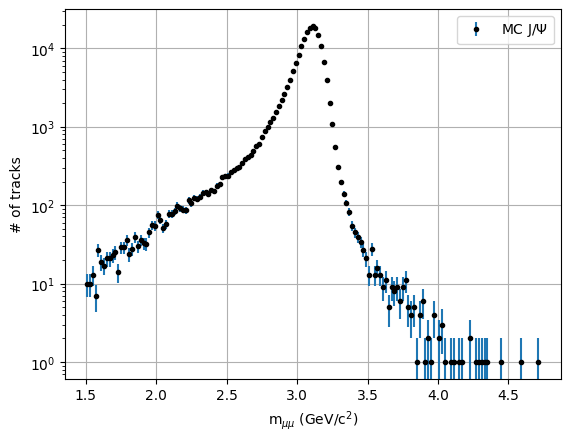

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [19488.091372732215, 3.1018281526716036, 0.06121484064166131, 0.9152257793252088, 3.194119534114966, 2.383731463403021, 2.5386067325770267]
pcov: 
 [[ 1.56800977e+04  1.59274334e-02 -3.19044024e-02 -1.17447396e-01
  -3.62424605e-01 -9.93799753e-01  2.25015181e+00]
 [ 1.59274334e-02  2.50399512e-07 -1.37246574e-07 -4.31787600e-06
   1.34044969e-05 -2.60545001e-06  3.18012942e-06]
 [-3.19044024e-02 -1.37246574e-07  1.82732637e-07  3.53898095e-06
  -8.13368620e-06  7.20073629e-06 -1.46143286e-05]
 [-1.17447396e-01 -4.31787600e-06  3.53898095e-06  1.88154013e-04
  -8.18359947e-04  1.25520881e-04 -2.25993574e-04]
 [-3.62424605e-01  1.34044969e-05 -8.13368620e-06 -8.18359947e-04
   5.19341266e-03 -2.41309915e-04  3.68447291e-04]
 [-9.93799753e-01 -2.60545001e-06  7.20073629e-06  1.25520881e-04
  -2.41309915e-04  2.59376432e-03 -8.46112231e-03]
 [ 2.25015181e+00  3.18012942e-06 -1.46143286e-05 -2.25993574e-04
   3.68447291e-04 -8.46112231e-03  3.74430660e-02]]
residual: 
 {'nfev': 9, 

fit error : 125.22037813661437


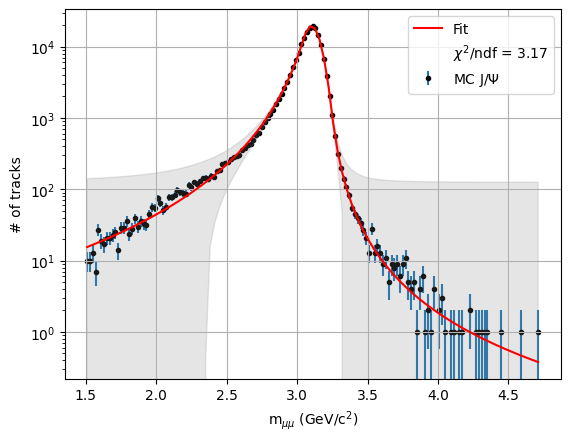

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

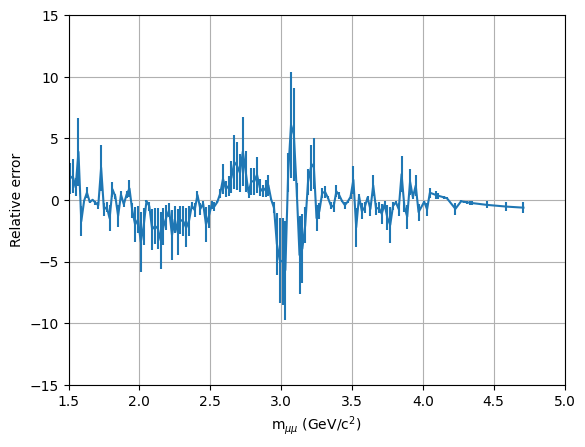

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

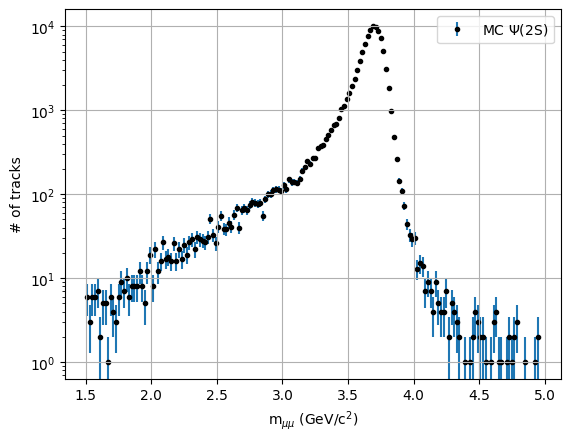

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [10189.148444130231, 3.69501182563324, 0.06293679490702209, 0.8998251587620376, 2.875146144748849, 2.452121813819446, 2.452482404078392]
pcov: 
 [[ 5.84740257e+03  1.17324849e-02 -2.27600588e-02 -5.20084691e-02
  -2.25600382e-01 -6.95613113e-01  1.65708106e+00]
 [ 1.17324849e-02  3.82118864e-07 -2.07929252e-07 -5.84544983e-06
   1.39078773e-05 -4.03749554e-06  5.54431019e-06]
 [-2.27600588e-02 -2.07929252e-07  2.61839647e-07  4.61373816e-06
  -8.17664310e-06  1.00752659e-05 -2.12750552e-05]
 [-5.20084691e-02 -5.84544983e-06  4.61373816e-06  2.20238486e-04
  -7.31552971e-04  1.60607306e-04 -3.01338424e-04]
 [-2.25600382e-01  1.39078773e-05 -8.17664310e-06 -7.31552971e-04
   3.63551463e-03 -2.37027540e-04  3.78891422e-04]
 [-6.95613113e-01 -4.03749554e-06  1.00752659e-05  1.60607306e-04
  -2.37027540e-04  4.49008369e-03 -1.53041448e-02]
 [ 1.65708106e+00  5.54431019e-06 -2.12750552e-05 -3.01338424e-04
   3.78891422e-04 -1.53041448e-02  6.80609000e-02]]
residual: 
 {'nfev': 8, 'fv

fit error : 76.46881050523398


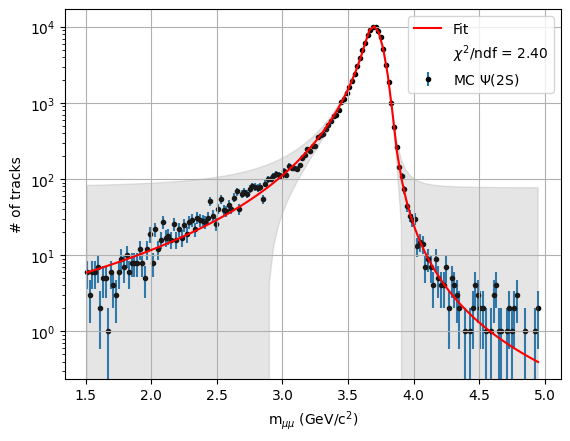

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

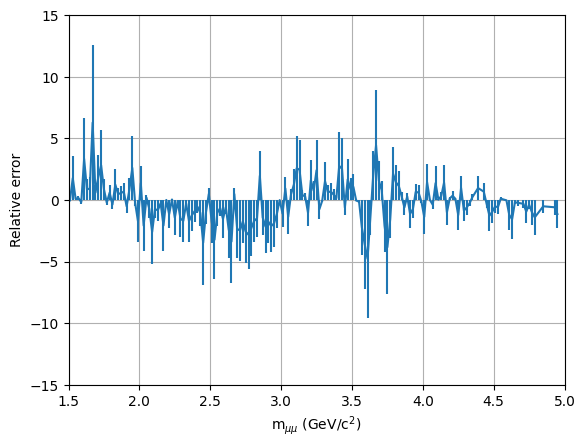

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

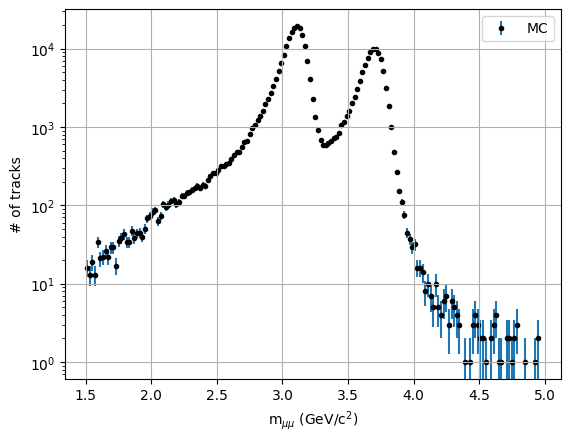

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [19460.86103440312, 3.101579087797941, 0.06140394230436939, 10198.345906711029, 3.6950605126506653, 0.06286227092302794]
pcov: 
 [[ 1.59227840e+04  1.10994472e-02 -2.74620604e-02 -5.96226622e+01
  -9.44164926e-04  1.16691239e-03]
 [ 1.10994472e-02  1.44520997e-07 -3.47944408e-08 -9.62078450e-06
   1.41288488e-09 -8.83255055e-10]
 [-2.74620604e-02 -3.47944408e-08  9.16554906e-08  7.37386325e-04
   9.68876298e-09 -1.28205596e-08]
 [-5.96226622e+01 -9.62078450e-06  7.37386325e-04  7.96823162e+03
   1.33797459e-02 -2.75093540e-02]
 [-9.44164926e-04  1.41288488e-09  9.68876298e-09  1.33797459e-02
   2.95970003e-07 -9.59741165e-08]
 [ 1.16691239e-03 -8.83255055e-10 -1.28205596e-08 -2.75093540e-02
  -9.59741165e-08  1.87883529e-07]]
residual: 
 {'nfev': 5, 'fvec': array([ 1.39255387,  2.58050949,  0.93424097,  3.01661354, -1.59164122,
        1.00436679,  0.9656243 ,  0.29450725,  1.39071984,  0.11074576,
        0.32033773,  3.61687781, -0.3104377 , -0.57080641, -1.0871535 ,
        

fit error : 154.56718799277274


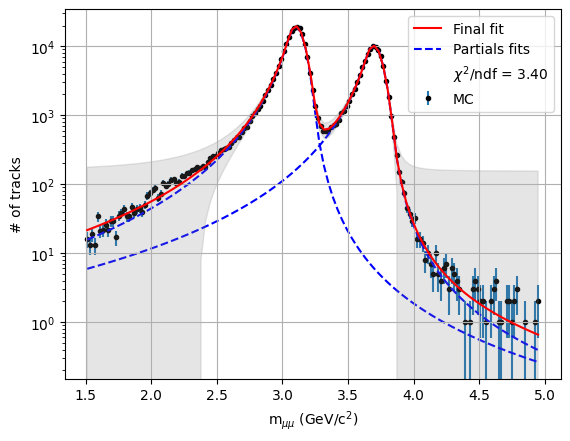

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_12949/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


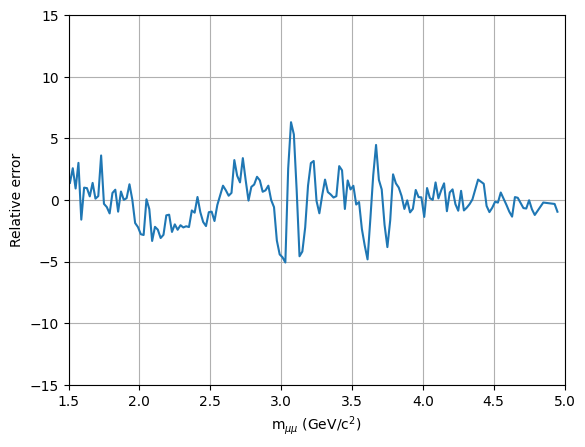

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

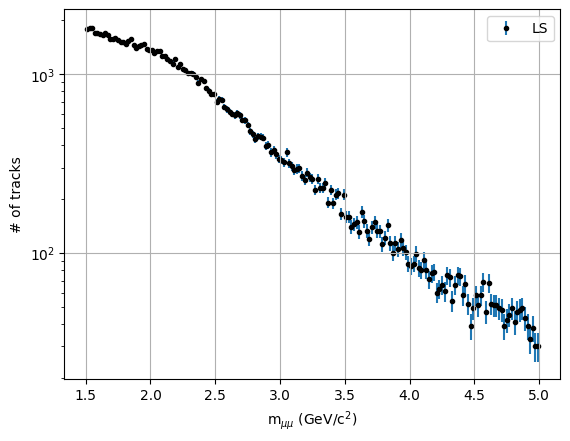

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [7.444767098494241, 6.628604083142252, 5.207050737020619, 4.763520655016389, 3.5450217472882835]
pcov: 
 [[ 1.26719560e-04 -2.02462261e-05  3.50424337e-05  4.64545368e-06
   9.08931638e-05]
 [-2.02462261e-05  3.53206070e-05  1.42296817e-05 -4.94028682e-06
   3.86060353e-05]
 [ 3.50424337e-05  1.42296817e-05  1.19767113e-04  1.13460955e-04
  -6.94926995e-05]
 [ 4.64545368e-06 -4.94028682e-06  1.13460955e-04  2.09645659e-04
  -3.67442296e-04]
 [ 9.08931638e-05  3.86060353e-05 -6.94926995e-05 -3.67442296e-04
   4.05707344e-03]]
residual: 
 {'nfev': 17, 'fvec': array([-1.89518817, -2.45284597, -2.21867147,  0.18850018,  0.25105251,
        0.33037129,  0.9233333 , -0.82026912,  0.28430901,  1.85888384,
        1.89593051,  0.77689028,  1.31844176,  2.03172081,  1.49247918,
        2.09026217,  0.22331172, -1.07915034,  1.26510939,  2.28742075,
        0.57999592, -0.47247275, -1.47437991,  0.39068282,  0.21963012,
       -0.66689047,  0.22793514, -1.36606359, -2.06272651, -0.322542

fit error : 0.06744276374523472


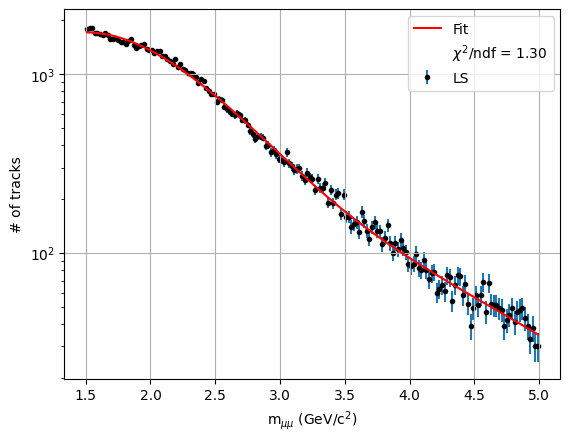

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

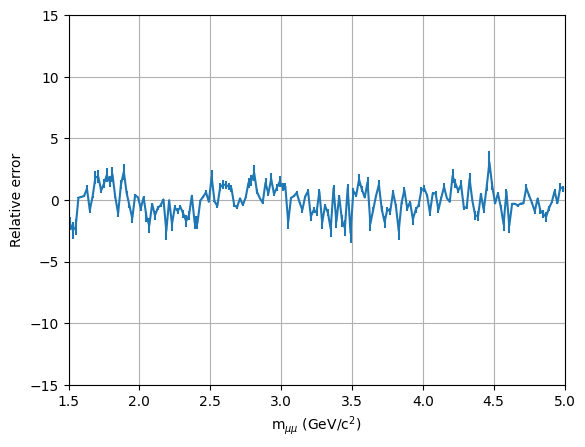

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

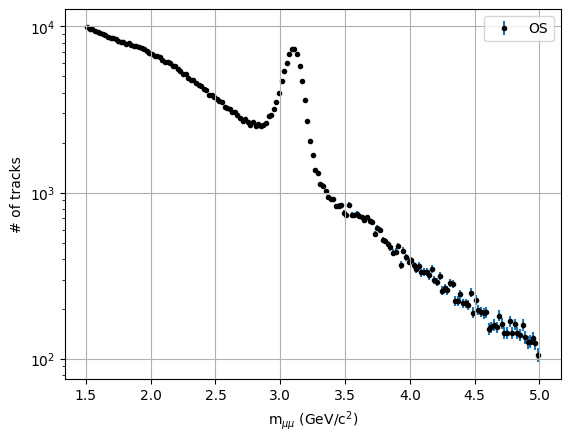

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [6023.912736579823, 3.099195433203426, 0.06733632470582739, 114.4500763044596, 3.6686447203519035, 0.06923047439769658, 9.160421699412245, 8.18923302489388, 6.68714788910742, 6.19967566252795, 4.723742734238849]
pcov: 
 [[ 4.28446840e+03  8.90551633e-03 -2.99173312e-02  2.13278785e+01
  -2.23582242e-02  4.16352209e-02 -1.87764247e-02 -1.15502975e-02
  -6.16771990e-02 -4.12575352e-02 -2.20328591e-02]
 [ 8.90551633e-03  6.32785647e-07 -2.65518420e-07 -4.55609024e-04
   6.27640100e-07 -1.07980577e-06  2.69793643e-07  8.37638575e-07
   1.81785489e-06  8.88910494e-07  1.64501490e-06]
 [-2.99173312e-02 -2.65518420e-07  7.19709448e-07  1.80285843e-03
  -1.12023440e-06  2.17725786e-06 -9.59144209e-07 -1.78577232e-06
  -4.97189047e-06 -3.08517619e-06 -2.34927530e-06]
 [ 2.13278785e+01 -4.55609024e-04  1.80285843e-03  4.73269003e+02
   3.28382258e-02 -1.78508853e-01 -1.01974732e-02 -9.29545451e-03
  -5.99782636e-02 -6.65416003e-02  7.39644837e-02]
 [-2.23582242e-02  6.27640100e-07 -1.120

fit error : 68.97637841057035


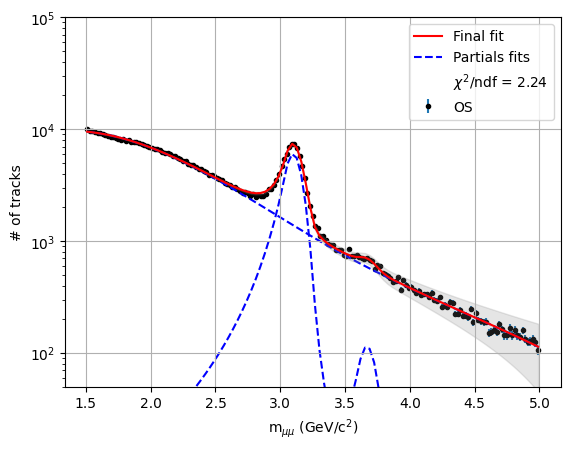

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

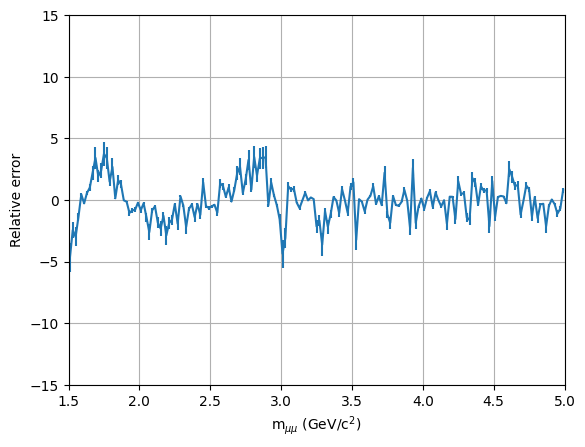

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  63032.44640880457  +/-  1180.7182902835832 (stat.)
